In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

I will use the two tables that I created using SQL for the Tableau part of the project, since they both include the data I am interested in examining further.

In [2]:
df_1 = pd.read_excel('Tableau 1.xlsx')
df_2 = pd.read_excel('Tableau 2.xlsx')

In [3]:
df_1.dtypes

Country          object
Continent        object
Year              int64
Population        int64
UrbanPop%       float64
MedianAge       float64
Unemployment    float64
dtype: object

In [4]:
df_2.dtypes

Country           object
Continent         object
Year               int64
FertilityRate    float64
dtype: object

For convenience purposes, I will transfer the Fertility Rate column to the first table.

In [5]:
df_1['FertilityRate'] = np.zeros(len(df_1['Year']))

In [6]:
for i in range(len(df_1['Year'])):
    df_1.loc[[i],['FertilityRate']] = df_2[(df_2['Country'] == df_1.iloc[i]['Country']) & (df_2['Year'] == df_1.iloc[i]['Year'])]['FertilityRate'].values[0]

In [7]:
df_1.head()

,Country,Continent,Year,Population,UrbanPop%,MedianAge,Unemployment,FertilityRate
0,Lesotho,Africa,1995,1898598,15.7,18.2,37.34,4.46
1,North Macedonia,Europe,1995,1983252,59.6,30.7,35.60,2.12
2,Algeria,Africa,1995,28757785,56.3,19.4,31.84,4.12
3,South Africa,Africa,1995,41435758,55.3,21.3,29.89,3.51
4,Djibouti,Africa,1995,630388,76.3,18.1,28.94,5.85


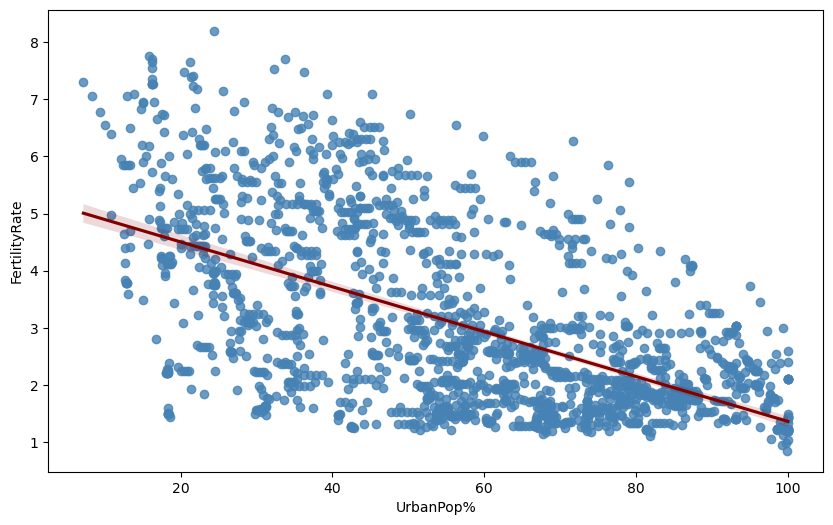

In [8]:
sns.regplot(x='UrbanPop%', y='FertilityRate', data=df_1, scatter_kws={"color":"steelblue"}, line_kws={"color":"maroon"})
plt.show()

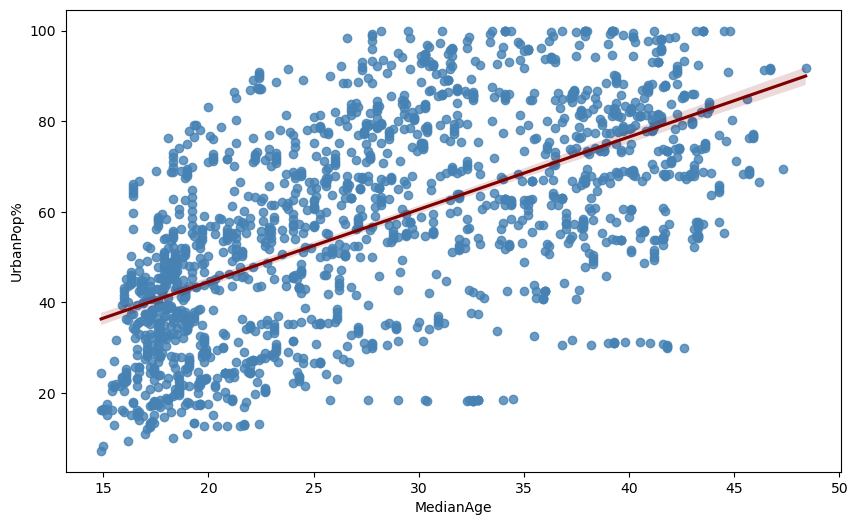

In [9]:
sns.regplot(x='MedianAge', y='UrbanPop%', data=df_1, scatter_kws={"color":"steelblue"}, line_kws={"color":"maroon"})
plt.show()

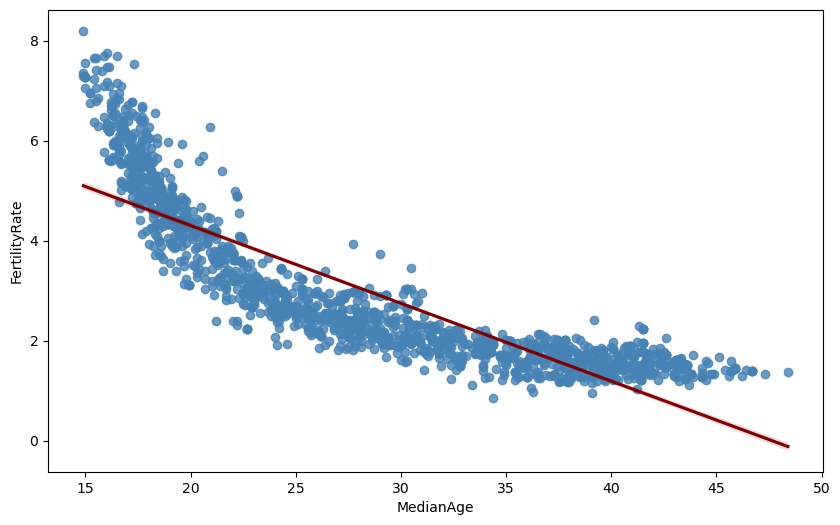

In [10]:
sns.regplot(x='MedianAge', y='FertilityRate', data=df_1, scatter_kws={"color":"steelblue"}, line_kws={"color":"maroon"})
plt.show()

So far we can see that the relationship between median age and fertility rate does not appear to be linear. I did not include the graphs that showed virtually no possible correlation between the parameters, so we are interested just in these three.

In [11]:
corr_matrix = df_1.corr("pearson", numeric_only=True)
corr_matrix

,Year,Population,UrbanPop%,MedianAge,Unemployment,FertilityRate
Year,1.000000,0.025989,0.114786,0.211186,-0.059147,-0.200693
Population,0.025989,1.000000,-0.058952,0.038391,-0.091649,-0.066826
UrbanPop%,0.114786,-0.058952,1.000000,0.604267,0.096179,-0.580760
MedianAge,0.211186,0.038391,0.604267,1.000000,0.038904,-0.868924
Unemployment,-0.059147,-0.091649,0.096179,0.038904,1.000000,-0.104568
FertilityRate,-0.200693,-0.066826,-0.580760,-0.868924,-0.104568,1.000000


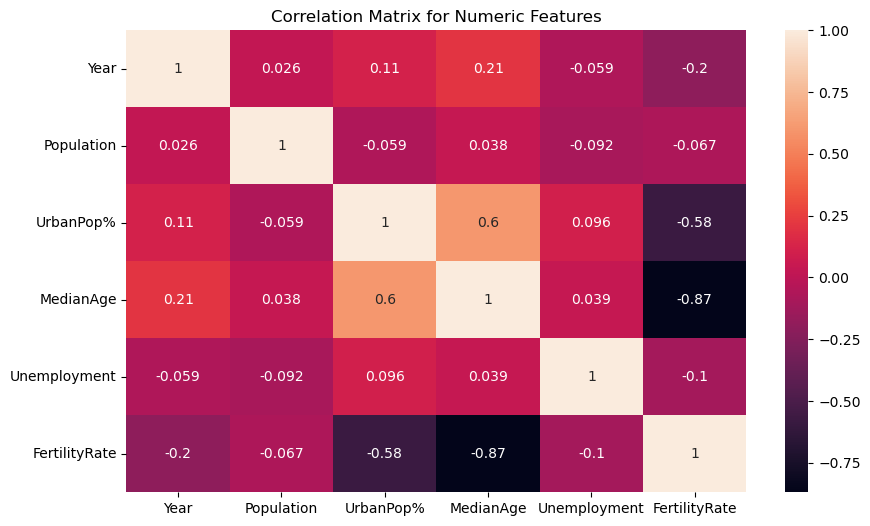

In [12]:
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [13]:
df_numerized = df_1.copy()
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,Country,Continent,Year,Population,UrbanPop%,MedianAge,Unemployment,FertilityRate
0,92,0,1995,1898598,15.7,18.2,37.34,4.46
1,122,2,1995,1983252,59.6,30.7,35.60,2.12
2,2,0,1995,28757785,56.3,19.4,31.84,4.12
3,150,0,1995,41435758,55.3,21.3,29.89,3.51
4,45,0,1995,630388,76.3,18.1,28.94,5.85


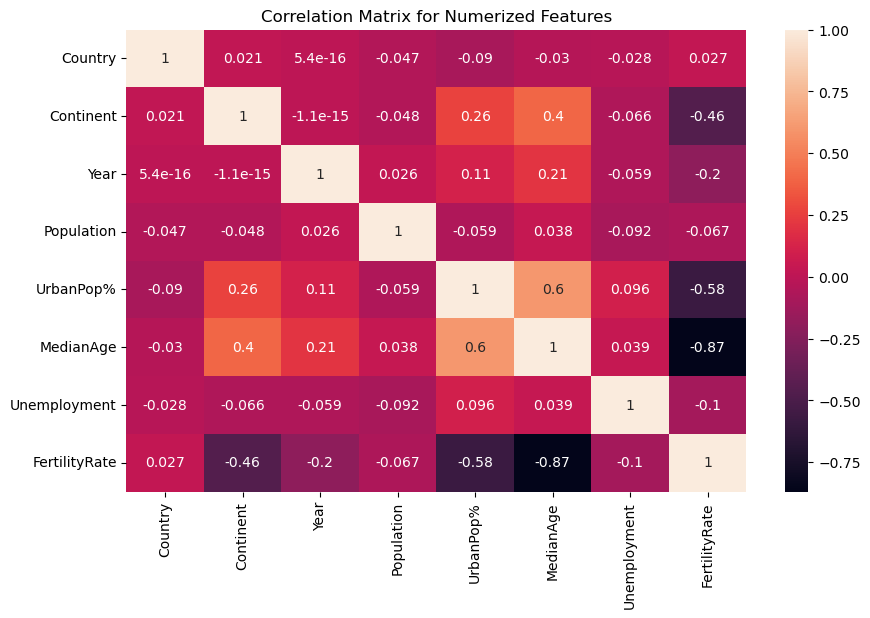

In [14]:
corr_matrix2 = df_numerized.corr("pearson", numeric_only=True)
sns.heatmap(corr_matrix2, annot=True)
plt.title('Correlation Matrix for Numerized Features')
plt.show()

In [15]:
corr_pairs = corr_matrix2.unstack()
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

MedianAge      FertilityRate   -0.868924
FertilityRate  MedianAge       -0.868924
UrbanPop%      FertilityRate   -0.580760
FertilityRate  UrbanPop%       -0.580760
               Continent       -0.464282
                                  ...   
Population     Population       1.000000
Year           Year             1.000000
Continent      Continent        1.000000
Unemployment   Unemployment     1.000000
FertilityRate  FertilityRate    1.000000
Length: 64, dtype: float64

In [16]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

UrbanPop%      MedianAge        0.604267
MedianAge      UrbanPop%        0.604267
Country        Country          1.000000
MedianAge      MedianAge        1.000000
UrbanPop%      UrbanPop%        1.000000
Population     Population       1.000000
Year           Year             1.000000
Continent      Continent        1.000000
Unemployment   Unemployment     1.000000
FertilityRate  FertilityRate    1.000000
dtype: float64

In [17]:
low_corr = sorted_pairs[(sorted_pairs) < -0.5]
low_corr

MedianAge      FertilityRate   -0.868924
FertilityRate  MedianAge       -0.868924
UrbanPop%      FertilityRate   -0.580760
FertilityRate  UrbanPop%       -0.580760
dtype: float64

The numbers show that there is some correlation between the three parameters I examined through scatter plots: urban population %, median age and fertility rate.